# Task2: HOUSE PRICE PREDICTION

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [367]:
data=pd.read_csv("data.csv")

In [368]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [369]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [371]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [372]:
data.duplicated().sum()

0

<Axes: xlabel='city'>

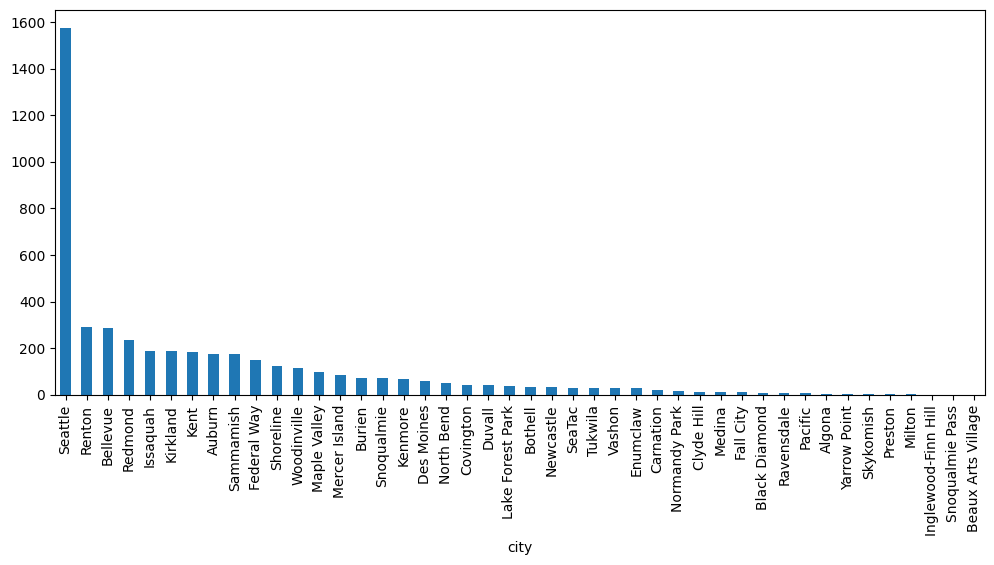

In [373]:
data.city.value_counts().plot(kind='bar',figsize=(12,5))

In [374]:
cities = data.groupby('city')['price'].mean()
top_ten_expensive_cities = cities.sort_values(ascending=False).head(10)

<Axes: xlabel='city'>

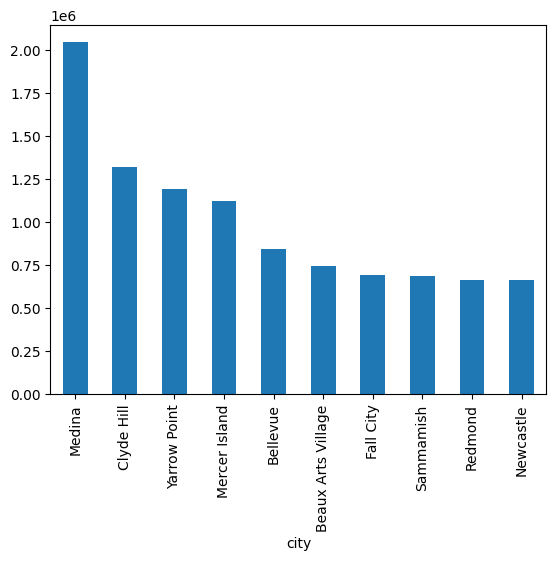

In [375]:
top_ten_expensive_cities.plot(kind= 'bar')

<Axes: xlabel='yr_built', ylabel='price'>

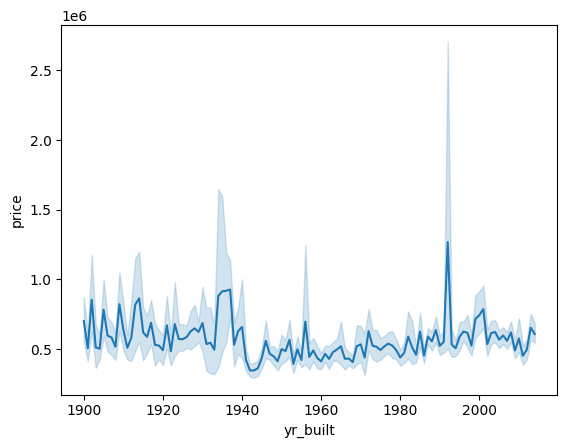

In [376]:
sns.lineplot(data,x='yr_built',y = 'price')

In [377]:
df=data.copy()

In [378]:
numeric_col=df.select_dtypes(include=['float64','int64'])

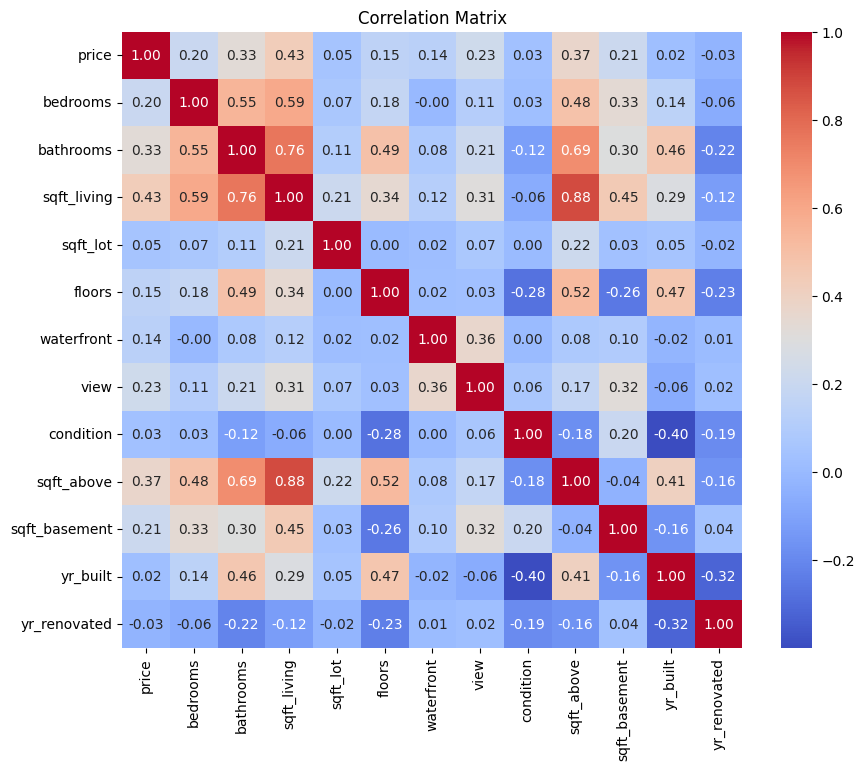

In [379]:
correlation_matrix = numeric_col.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [380]:
df['date'] = pd.to_datetime(df['date'])
# df[['state', 'zip']] = data['statezip'].str.split(' ', expand=True)

In [381]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [382]:
# df.drop(['statezip'],axis=1,inplace=True)

In [383]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [384]:

df['age'] = df['date'].dt.year - df['yr_built']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,59
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,38


In [385]:
# df['last_renovated'] = df['date'].dt.year - df['yr_renovated']

In [386]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,59
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,93
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,48
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,51
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,38


In [387]:
df['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [388]:
df.drop(['date','yr_built','country'],axis =1, inplace = True)

In [389]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,street,city,statezip,age
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005,18810 Densmore Ave N,Shoreline,WA 98133,59
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,0,709 W Blaine St,Seattle,WA 98119,93
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,48
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0,857 170th Pl NE,Bellevue,WA 98008,51
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992,9105 170th Ave NE,Redmond,WA 98052,38


In [390]:
df.describe(include='object')

,street,city,statezip
count,4600,4600,4600
unique,4525,44,77
top,2520 Mulberry Walk NE,Seattle,WA 98103
freq,4,1573,148


In [391]:
# df['state'].value_counts()


In [392]:
# df.drop(columns=['state'],inplace=True)

In [393]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,street,city,statezip,age
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005,18810 Densmore Ave N,Shoreline,WA 98133,59
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,0,709 W Blaine St,Seattle,WA 98119,93
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,48
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0,857 170th Pl NE,Bellevue,WA 98008,51
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992,9105 170th Ave NE,Redmond,WA 98052,38


In [395]:
X = df.drop('price',axis='columns')
y = df.price

In [ ]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from category_encoders import MEstimateEncoder

In [396]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,street,city,statezip,age
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,2005,18810 Densmore Ave N,Shoreline,WA 98133,59
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,0,709 W Blaine St,Seattle,WA 98119,93
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,0,26206-26214 143rd Ave SE,Kent,WA 98042,48
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,0,857 170th Pl NE,Bellevue,WA 98008,51
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1992,9105 170th Ave NE,Redmond,WA 98052,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1979,501 N 143rd St,Seattle,WA 98133,60
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,2009,14855 SE 10th Pl,Bellevue,WA 98007,31
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,0,759 Ilwaco Pl NE,Renton,WA 98059,5
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,0,5148 S Creston St,Seattle,WA 98178,40


In [397]:
df = df[['street', 'statezip', 'city', 'sqft_living', 'sqft_above', 'bathrooms', 'sqft_lot']]
df

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500
...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630


In [398]:
df.join(y)

,street,statezip,city,sqft_living,sqft_above,bathrooms,sqft_lot,price
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,7912,3.130000e+05
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,9050,2.384000e+06
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,11947,3.420000e+05
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,8030,4.200000e+05
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,10500,5.500000e+05
...,...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,6360,3.081667e+05
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,7573,5.343333e+05
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,7014,4.169042e+05
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,6630,2.034000e+05


In [399]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [400]:
encoder = MEstimateEncoder(cols=['street','statezip','city'], m=0.5)

X = encoder.fit_transform(X, y)

In [401]:
X

,street,statezip,city,sqft_living,sqft_above,bathrooms
0,10225.505362,6862.879765,9125.645814,1340,1340,1.50
1,10984.172029,4278.086021,5329.652531,3650,3370,2.50
2,12915.505362,18250.092120,15156.103817,1930,1930,2.00
3,10304.172029,10533.153625,13743.117829,2000,1000,2.25
4,11950.838696,11315.212236,23916.905554,1940,1140,2.50
...,...,...,...,...,...,...
4595,9190.838696,6862.879765,5329.652531,1510,1510,1.75
4596,9999.505362,13647.348305,13743.117829,1460,1460,2.50
4597,9626.838696,15887.091625,14556.419959,3010,3010,2.50
4598,9370.838696,8715.318344,5329.652531,2090,1070,2.00


In [402]:
y

0        7912
1        9050
2       11947
3        8030
4       10500
        ...  
4595     6360
4596     7573
4597     7014
4598     6630
4599     8102
Name: sqft_lot, Length: 4600, dtype: int64

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=400, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [404]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

In [405]:

results = {}
for name, model in models.items():
     mae, mse, rmse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
     results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [406]:
results_df = pd.DataFrame(results).T
results_df


,MAE,MSE,RMSE,R2
Linear Regression,138.482789,1.963162e+05,443.075886,0.999858
Random Forest,231.662908,3.205945e+06,1790.515276,0.997675
Decision Tree,345.339130,5.781536e+06,2404.482390,0.995807
Gradient Boosting,312.717079,3.111333e+06,1763.897225,0.997744


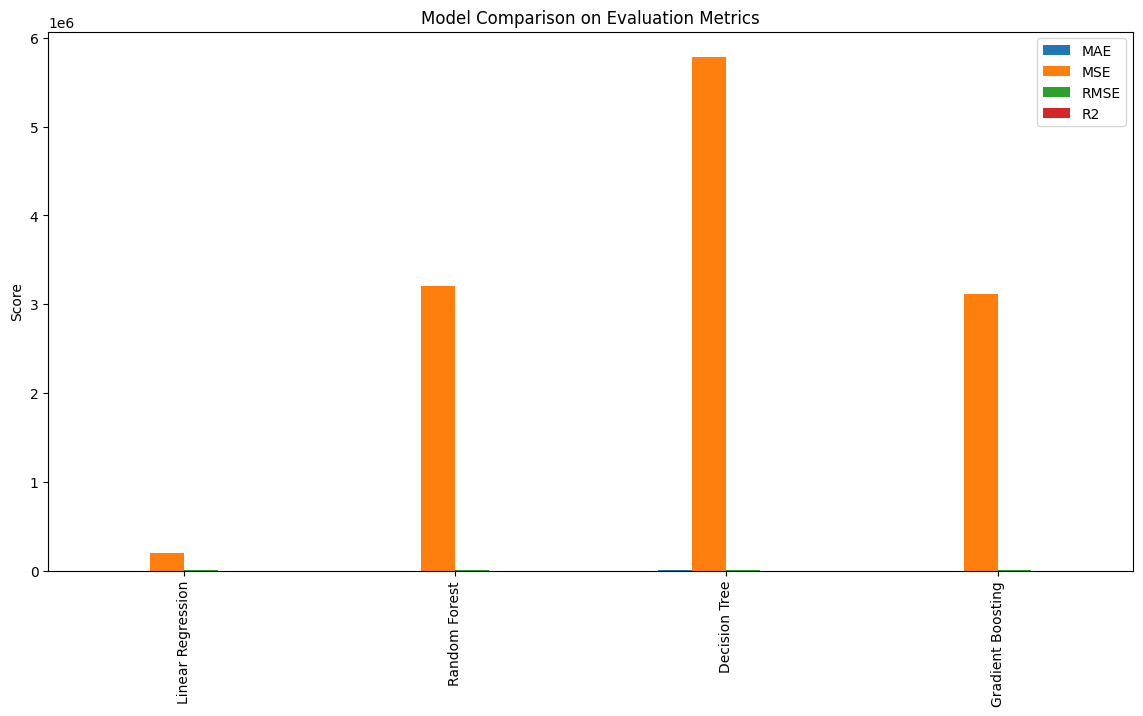

In [407]:
results_df.plot(kind='bar', figsize=(14, 7))
plt.title('Model Comparison on Evaluation Metrics')
plt.ylabel('Score')
plt.show()